## 1. Searching for gold inside HTML files
<p>It used to take days for financial news to spread via radio, newspapers, and word of mouth. Now, in the age of the internet, it takes seconds. Did you know news articles are <em>automatically</em> being generated from figures and earnings call streams? Hedge funds and independent traders are using data science to process this wealth of information in the quest for profit.</p>
<p>In this notebook, we will generate investing insight by applying <a href="https://en.wikipedia.org/wiki/Sentiment_analysis">sentiment analysis</a> on financial news headlines from <a href="https://finviz.com">FINVIZ.com</a>. Using this <a href="https://en.wikipedia.org/wiki/Natural_language_processing">natural language processing</a> technique, we can understand the emotion behind the headlines and predict whether the market <em>feels</em> good or bad about a stock. It would then be possible to make educated guesses on how certain stocks will perform and trade accordingly. (And hopefully, make money!)</p>
<p><img src="https://assets.datacamp.com/production/project_611/img/fb_headlines.png" alt="Facebook headlines from FINVIZ.com"></p>
<p>Why headlines? And why from FINVIZ?</p>
<ol>
<li>Headlines, which have similar length, are easier to parse and group than full articles, which vary in length.</li>
<li>FINVIZ has a list of trusted websites, and headlines from these sites tend to be more consistent in their jargon than those from independent bloggers. Consistent textual patterns will improve the sentiment analysis.</li>
</ol>
<p>As <a href="https://en.wikipedia.org/wiki/Web_scraping">web scraping</a> requires data science ethics (sending a lot of traffic to a FINVIZ's servers isn't very nice), the HTML files for Facebook and Tesla at various points in time have been downloaded. Let's import these files into memory.</p>
<p><strong>Disclaimer: Investing in the stock market involves risk and can lead to monetary loss. The content in this notebook is not to be taken as financial advice.</strong> </p>

## 1. Web scrapping

In [160]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import os

# Scrapping the website with BeautifulSoup
URL = 'https://finviz.com/quote.ashx?t=JPM&p=d'

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.3 Safari/605.1.15", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(URL, headers=headers)
soup1 = BeautifulSoup(page.content, "html.parser")

In [161]:
# take a look at the html
print(soup1)

<!DOCTYPE html>

<html lang="en">
<head>
<title>JPM - JPMorgan Chase &amp; Co. Stock Price and Quote</title>
<meta charset="utf-8"/><meta content="width=1024" name="viewport"/><meta content="JPM - JPMorgan Chase &amp; Co. - Stock screener for investors and traders, financial visualizations." name="description"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-700.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-900.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/inter-latin.woff2" rel="preload"/>
<script>
                window.notificationsArray = [];
                window.renderScriptNotLoaded = function () {};
                window.handleScriptNotLoaded = function (element) {
                    window.notificationsArray.push(element);
                    window.sentryDisabled = true;
                

In [162]:
# Save the output as html file
with open(os.path.join('/Users/nc/Python projects/Datacamp Projects/Financial headline sentiment anlysis/datasets','jpm_0314'+".html"),"w") as file:
    file.write(str(soup1))

In [163]:
# Import libraries

html_tables = {}

# For every table in the datasets folder...
for table_name in os.listdir('datasets'):
    #this is the path to the file.
    table_path = f'datasets/{table_name}'
    # Open as a python file in read-only mode
    table_file = open(table_path,mode='r')
    # Read the contents of the file into 'html'
    html = BeautifulSoup(table_file)  #<- bs4.BeautifulSoup object
    # Find 'news-table' in the Soup and load it into 'html_table'
    html_table = html.find(id='news-table')
    # Add the table to our dictionary
    html_tables[table_name] = html_table

In [164]:
# check the html_tables
html_tables

{'fb_22sep.html': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" style="white-space:nowrap" width="130">Sep-22-18 11:08AM  </td><td align="left"><a class="tab-link-news" href="https://www.cnbc.com/2018/09/22/bret-taylor-salesforce-ex-google-facebook-profile.html?__source=yahoo%7Cfinance%7Cheadline%7Cstory%7C&amp;par=yahoo&amp;yptr=yahoo" target="_blank">How former Facebook and Google engineer Bret Taylor earned Marc Benioff's trust at Salesforce</a> <span style="color:#aa6dc0;font-size:9px">CNBC</span></td></tr>
 <tr><td align="right" width="130">12:02AM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/news/draft-order-trump-crack-down-040227816.html" target="_blank">White House Drafts Order To Look Into Google, Facebook Practices</a> <span style="color:#aa6dc0;font-size:9px">Bloomberg</span></td></tr>
 <tr><td align="right" style="white-space:nowrap" width="130">Sep-21-18

In [165]:
html_tables.keys() ##<- can list() it to become a list for indexing

dict_keys(['fb_22sep.html', 'tsla_22sep.html', 'fb_05ene.html', 'tsla_26nov.html', 'jpm_0314.html', 'tsla_05ene.html'])

In [166]:
html_tables.values()

dict_values([<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Sep-22-18 11:08AM  </td><td align="left"><a class="tab-link-news" href="https://www.cnbc.com/2018/09/22/bret-taylor-salesforce-ex-google-facebook-profile.html?__source=yahoo%7Cfinance%7Cheadline%7Cstory%7C&amp;par=yahoo&amp;yptr=yahoo" target="_blank">How former Facebook and Google engineer Bret Taylor earned Marc Benioff's trust at Salesforce</a> <span style="color:#aa6dc0;font-size:9px">CNBC</span></td></tr>
<tr><td align="right" width="130">12:02AM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/news/draft-order-trump-crack-down-040227816.html" target="_blank">White House Drafts Order To Look Into Google, Facebook Practices</a> <span style="color:#aa6dc0;font-size:9px">Bloomberg</span></td></tr>
<tr><td align="right" style="white-space:nowrap" width="130">Sep-21-18 06:21PM

## 2. What is inside those files anyway?
<p>We've grabbed the table that contains the headlines from each stock's HTML file, but before we start parsing those tables further, we need to understand how the data in that table is structured. We have a few options for this:</p>
<ul>
<li>Open the HTML file with a text editor (preferably one with syntax highlighting, like <a href="http://www.sublimetext.com/">Sublime Text</a>) and explore it there</li>
<li>Use your browser's <a href="https://addons.mozilla.org/en-US/firefox/addon/web-developer/">webdev toolkit</a> to explore the HTML</li>
<li>Explore the headlines table here in this notebook!</li>
</ul>
<p>Let's do the third option.</p>

In [167]:
# Read one single day of headlines 
tsla = html_tables['tsla_22sep.html']
# Get all the table rows tagged in HTML with <tr> into 'tesla_tr'. i.e. removing the first row
tsla_tr = tsla.find_all('tr')
len(tsla_tr) #<-100; contains 100 headlines
tsla_tr[0]

# For each row...
for i, table_row in enumerate(tsla_tr):
    # Read the text of the element 'a' into 'link_text'
    link_text = table_row.find('a').get_text() #<-note find_all does not work here with contents
    ##.get_text() gives text without []; .contents gives text in []
    ## recall <a> is Stands for anchor tag. The tag defines a hyperlink, which is used to 
    ## link from one page to another. The most important attribute of the element is the href attribute, which indicates the link's destination.
    
    # Read the text of the element 'td' into 'data_text'
    data_text = table_row.find('td').get_text()
    # Print the count
    print(f'File number {i+1}:')
    # Print the contents of 'link_text' and 'data_text' 
    print(link_text)
    print(data_text)
    # The following exits the loop after four rows to prevent spamming the notebook, do not touch
    if i == 3:  #<-effectively limited the result to 4 rows only
        break

        
############################
# tsla_tr[0].find('td')
# tsla_tr[0].td  ## equivalent as above
# tsla_tr[0].td.text  #<- getting content inside the td tag
# tsla_tr[0].td.text.split() #<- ['Sep-21-18', '09:56PM']

# tsla_tr[1].td.text.split() #<-['09:30PM']

## only the first headline contain date, the following only contain time


File number 1:
Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets
Sep-21-18 09:56PM  
File number 2:
Broadcoms Stock Looks Like a Winner
09:30PM  
File number 3:
SHAREHOLDER ALERT:  Pomerantz Law Firm Reminds Shareholders with Losses on their Investment in Tesla, Inc. of Class Action Lawsuit and Upcoming Deadline  TSLA
05:30PM  
File number 4:
Tesla's People Problem and the Inscrutable Musk: 2 Things That Make You Go Hmmm
05:30PM  


In [168]:
## reconstruct the cell above

tsla = html_tables['tsla_22sep.html']
tsla_tr = tsla.find_all('tr')  ## exactly = .findAll('tr)
tsla_tr[0] # <tr><td align="right" style="white-space:nowrap" width="130">Sep-21-18 09:56PM  </td><td align="left"><a class="tab-link-news" href="https://finance.yahoo.com/video/billionaire-investor-questions-elon-musk-015608758.html" target="_blank">Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets</a> <span style="color:#aa6dc0;font-size:9px">Fox Business Videos</span></td></tr>
tsla_tr[0].find('a') # <a class="tab-link-news" href="https://finance.yahoo.com/video/billionaire-investor-questions-elon-musk-015608758.html" target="_blank">Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets</a>
tsla_tr[0].find('a').get_text() #<-"Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets"
tsla_tr[0].find('td') # <td align="right" style="white-space:nowrap" width="130">Sep-21-18 09:56PM  </td>
tsla_tr[0].find('td').get_text()  #<-'Sep-21-18 09:56PM\xa0\xa0'
print(tsla_tr[0].find('td').get_text())  #<- Sep-21-18 09:56PM


Sep-21-18 09:56PM  


In [169]:
html_tables['jpm_0314.html'].find_all('tr')[0]

<tr><td align="right" width="130">Mar-31-23 03:58PM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/m/e9c478d3-21fe-36eb-a9a6-d18639bfc07a/google-co-founder%2C-other.html" onclick="trackAndOpenNews(event, 'The Wall Street Journal', 'https://finance.yahoo.com/m/e9c478d3-21fe-36eb-a9a6-d18639bfc07a/google-co-founder%2C-other.html');" rel="nofollow" target="_blank">Google Co-Founder, Other Billionaires Are Issued Subpoenas in Lawsuit Over JPMorgans Ties to Jeffrey Epstein</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> The Wall Street Journal</span></div></div></td></tr>

## 3. Extra, extra! Extract the news headlines
<p>As we saw above, the interesting data inside each table row (<code>&lt;tr&gt;</code>) is in the text inside the <code>&lt;td&gt;</code> and <code>&lt;a&gt;</code> tags. Let's now actually parse the data for <strong>all</strong> tables in a comfortable data structure.</p>

In [170]:
# Hold the parsed news into a list
parsed_news = []
# Iterate through the news
for file_name, news_table in html_tables.items():  ## news_table ~ tsla above ## recall, displays a list of dictionary's (key, value) tuple pairs.
    # Iterate through all tr tags in 'news_table'  
    for x in news_table.findAll('tr'):             ## x simialr to tsla_tr above
        # Read the text from the tr tag into text
        text = x.a.text                            ## getting the text of the link from each headline
        # Split the text in the td tag into a list 
        date_scrape = x.td.text.split()   ## give ['Sep-21-18', '09:56PM'] for first row then ['09:30PM'].. i.e. only the first headline contain the date
        # If the length of 'date_scrape' is 1, load 'time' as the only element
        # If not, load 'date' as the 1st element and 'time' as the second
        if len(date_scrape) == 1:
            time = date_scrape[0]
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name[:file_name.find('_')]
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])  ## result in a list of list
        
        
#############
list(html_tables.keys())[0] ##<- 'fb_22sep.html'
list(html_tables.keys())[0].find('_') ##<-2
list(html_tables.keys())[0][:list(html_tables.keys())[0].find('_')] ##<-'fb'

'fb'

In [171]:
parsed_news

[['fb',
  'Sep-22-18',
  '11:08AM',
  "How former Facebook and Google engineer Bret Taylor earned Marc Benioff's trust at Salesforce"],
 ['fb',
  'Sep-22-18',
  '12:02AM',
  'White House Drafts Order To Look Into Google, Facebook Practices'],
 ['fb',
  'Sep-21-18',
  '06:21PM',
  'Facebook Withdraws Direct Promotion of Political Campaigns'],
 ['fb',
  'Sep-21-18',
  '06:18PM',
  "Facebook's Plan to Pull Back Campaign Support to Trump in 2020"],
 ['fb',
  'Sep-21-18',
  '06:17PM',
  "Facebook's Plan to Pull Back Campaign Support to Trump in 2020"],
 ['fb', 'Sep-21-18', '06:10PM', 'Does F.A.N.G. still stand? 8 trades'],
 ['fb',
  'Sep-21-18',
  '05:28PM',
  'As stocks hit all-time highs, the F.A.N.G. trade is left ...'],
 ['fb',
  'Sep-21-18',
  '05:21PM',
  'Its time for companies to end the obsession with millennials and hire older workers with skills and expertise'],
 ['fb',
  'Sep-21-18',
  '04:04PM',
  'Earnings Reports for the Week of Sept. 24-28 (KBH, NKE, RAD)'],
 ['fb',
  'Sep-2

## 4. Make NLTK think like a financial journalist
<p>Sentiment analysis is very sensitive to context. As an example, saying <em>"This is so addictive!"</em> often means something positive if the context is a video game you are enjoying with your friends, but it very often means something negative when we are talking about opioids. Remember that the reason we chose headlines is so we can try to extract sentiment from financial journalists, who like most professionals, have their own lingo. Let's now make NLTK think like a financial journalist by adding some new words and sentiment values to our lexicon.</p>

In [172]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [173]:
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer  ## Give a sentiment intensity score to sentences.

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

## 5. BREAKING NEWS: NLTK Crushes Sentiment Estimates
<p>Now that we have the data and the algorithm loaded, we will get to the core of the matter: programmatically predicting sentiment out of news headlines! Luckily for us, VADER is very high level so, in this case, we will not adjust the model further<sup>*</sup> other than the lexicon additions from before.</p>
<p><sup>*</sup>VADER "out-of-the-box" with some extra lexicon would likely translate into <strong>heavy losses</strong> with real money. A real sentiment analysis tool with chances of being profitable will require a very extensive and dedicated to finance news lexicon. Furthermore, it might also not be enough using a pre-packaged model like VADER.</p>

In [185]:
import pandas as pd
# Use these column names
columns = ['ticker', 'date', 'time', 'headline']
# Convert the list of lists into a DataFrame
scored_news = pd.DataFrame(parsed_news,columns=columns)
# Iterate through the headlines and get the polarity scores
scores = scored_news.headline.apply(vader.polarity_scores) #<-scores is a Panda Serie of dictionaries for each row
# # Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores.tolist())
# # Join the DataFrames
scored_news = scored_news.join(scores_df)
# # Convert the date column from string to datetime in order to just get the date out of it by .dt.date. but the return date would be object again
scored_news['date'] = pd.to_datetime(scored_news.date).dt.date

################
# vader.polarity_scores(scored_news.iloc[0]['headline'])
# scores.to_frame() #<-this will give a stupid Df
## should convert the serie into a list then form a df
# scores.tolist()
# pd.DataFrame(scores.tolist())

# scored_news.join(scores_df)
 

In [186]:
scored_news[scored_news.ticker=='jpm']

,ticker,date,time,headline,neg,neu,pos,compound
400,jpm,2023-03-31,03:58PM,"Google Co-Founder, Other Billionaires Are Issu...",0.119,0.881,0.000,-0.2263
401,jpm,2023-03-31,02:26PM,Breaking Down Upcoming Bank Earnings,0.000,1.000,0.000,0.0000
402,jpm,2023-03-31,06:13AM,JPMorgan Chase & Co. (NYSE:JPM) Looks Interest...,0.099,0.709,0.191,0.3182
403,jpm,2023-03-30,11:31AM,Ecuador Bonds Slump as Investors Fear Presiden...,0.262,0.738,0.000,-0.4939
404,jpm,2023-03-30,08:00AM,Banks Warier of Serving Crypto Clients After B...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
495,jpm,2023-03-17,01:10PM,J.P. Morgan Recruits Advisors With $1.1 Billio...,0.000,0.825,0.175,0.1779
496,jpm,2023-03-17,12:28PM,Banking crisis will 'help the Fed': Strategist,0.347,0.424,0.229,-0.3400
497,jpm,2023-03-17,10:16AM,A Financial-Crisis Veteran Sizes Up the Bankin...,0.294,0.706,0.000,-0.3612
498,jpm,2023-03-17,09:05AM,3 Banks That Played Interest Rates Right and A...,0.315,0.387,0.298,-0.0772


## 6. Plot all the sentiment in subplots
<p>Now that we have the scores, let's start plotting the results. We will start by plotting the time series for the stocks we have.</p>

<AxesSubplot:xlabel='date'>

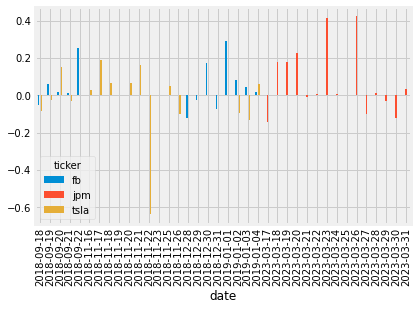

In [187]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = scored_news.groupby(['date','ticker']).mean() ##<-mean across the news on that date for that paricular stock
# Unstack the column ticker
mean_c = mean_c.unstack()
# # Get the cross-section of compound in the 'columns' axis
mean_c = mean_c.loc[:,'compound']
# # # # Plot a bar chart with pandas

mean_c.plot.bar()

####
# mean_c.loc[:,'compound']
# mean_c

In [188]:
mean_c

ticker,fb,jpm,tsla
date,,,
2018-09-18,-0.052564,NaN,-0.085650
2018-09-19,0.057568,NaN,-0.025949
2018-09-20,0.018447,NaN,0.148757
2018-09-21,0.014310,NaN,-0.030190
2018-09-22,0.255300,NaN,NaN
2018-11-16,NaN,NaN,0.026714
2018-11-17,NaN,NaN,0.190900
2018-11-18,NaN,NaN,0.067433
2018-11-19,NaN,NaN,0.002384


In [189]:
scored_news.groupby(['date','ticker']).mean().unstack().loc[:,'compound']

ticker,fb,jpm,tsla
date,,,
2018-09-18,-0.052564,NaN,-0.085650
2018-09-19,0.057568,NaN,-0.025949
2018-09-20,0.018447,NaN,0.148757
2018-09-21,0.014310,NaN,-0.030190
2018-09-22,0.255300,NaN,NaN
2018-11-16,NaN,NaN,0.026714
2018-11-17,NaN,NaN,0.190900
2018-11-18,NaN,NaN,0.067433
2018-11-19,NaN,NaN,0.002384


## 7. Duplicated headline
<p>What happened to Tesla on November 22nd? Since we happen to have the headlines inside our <code>DataFrame</code>, a quick peek reveals that there are a few problems with that particular day: </p>
<ul>
<li>There are only 5 headlines for that day.</li>
<li>Two headlines are verbatim the same as another but from another news outlet.</li>
</ul>
<p>Let's clean up the dataset a bit, but not too much! While some headlines are the same news piece from different sources, the fact that they are written differently could provide different perspectives on the same story. Plus, when one piece of news is more important, it tends to get more headlines from multiple sources. What we want to get rid of is verbatim copied headlines, as these are very likely coming from the same journalist and are just being "forwarded" around, so to speak.</p>

In [190]:
# Count the number of headlines in scored_news (store as integer)
num_news_before = scored_news.headline.count()
# Drop duplicates based on ticker and headline
scored_news_clean = scored_news.drop_duplicates(subset=['ticker','headline'],keep='first')
# # Count number of headlines after dropping duplicates
num_news_after = scored_news_clean.headline.count()
# # Print before and after numbers to get an idea of how we did 
f"Before we had {num_news_before} headlines, now we have {num_news_after}"



'Before we had 600 headlines, now we have 575'

In [191]:
# scored_news_clean.head()
# scored_news_clean.set_index(['ticker', 'date']).loc[('fb',slice(None))].loc['Sep-21-18']
# x = scored_news_clean.set_index(['ticker', 'date']).loc[('fb',slice(None))].loc['Sep-21-18']
# pd.to_datetime(x['time']).dt.time

KeyError: 'Sep-21-18'

## 8. Sentiment on one single trading day and stock
<p>Just to understand the possibilities of this dataset and get a better feel of the data, let's focus on one trading day and one single stock. We will make an informative plot where we will see the smallest grain possible: headline and subscores.</p>

In [210]:
single_day = scored_news_clean.set_index(['ticker', 'date'])
single_day = single_day.loc[('fb',slice(None))]
# single_day = single_day.loc['2018-09-22']
single_day.index = pd.DatetimeIndex(single_day.index)
single_day.loc['2019-01-02']

,time,headline,neg,neu,pos,compound
date,,,,,,
2019-01-02,10:35PM,Technology Stocks: Should You Bail?,0.000,1.000,0.000,0.0000
2019-01-02,06:46PM,Here's Why Facebook (FB) Stock Looks Like a Buy,0.000,0.737,0.263,0.3612
2019-01-02,05:16PM,New Guru Philippe Laffont's Top 5 Holdings,0.000,0.735,0.265,0.2023
2019-01-02,04:14PM,Should Mark Zuckerberg step away from Facebook?,0.000,1.000,0.000,0.0000
2019-01-02,04:05PM,Facebook to Announce Fourth Quarter and Full Y...,0.000,1.000,0.000,0.0000
2019-01-02,02:25PM,Mighty FAANG Stocks No Longer A Sure Bet For 2...,0.163,0.667,0.170,0.0258
2019-01-02,02:15PM,This Chart Implies That Google Stock Is Due fo...,0.000,1.000,0.000,0.0000
2019-01-02,01:36PM,Will Insiders Be Buying Stocks in 2019?,0.000,1.000,0.000,0.0000
2019-01-02,12:10PM,Stock Market News: Nasdaq Pares 1.9% Intraday ...,0.173,0.827,0.000,-0.3182


In [211]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])
# Cross-section the fb row
single_day = single_day.loc[('fb',slice(None))] ## getting all the rows for fb
# Converting the index to datetime index for slicing
single_day.index = pd.DatetimeIndex(single_day.index)
# # Select the 2nd of January of 2019
single_day = single_day.loc['2019-01-02']
# # Convert the datetime string to just the time
single_day['time'] = pd.to_datetime(single_day['time']).dt.time #<-without dt.time, it will automatically used end of month as date
# # # Set the index to time and 
single_day = single_day.set_index('time')
# # Sort it
single_day = single_day.sort_index()

In [212]:
single_day

,headline,neg,neu,pos,compound
time,,,,,
07:09:00,"During the Holidays, Unfriend Irksome Relative...",0.165,0.630,0.205,0.1280
07:51:00,Facebook Messenger tests Dark Mode to put less...,0.000,0.910,0.090,0.0240
08:13:00,[$$] Cyber Daily: CEOs Must Step Up,0.000,1.000,0.000,0.0000
08:27:00,Top 5 ROE Stocks to Invest in Now to Beat Mark...,0.000,0.847,0.153,0.2023
08:53:00,Oversold Facebook Stock Set for Big Bounce,0.000,1.000,0.000,0.0000
09:30:00,3 Reasons Why I Bought Stocks on Monday,0.000,1.000,0.000,0.0000
09:38:00,Stocks Dive As China Tariffs Bite; Dow Jones D...,0.000,1.000,0.000,0.0000
09:53:00,"Apple, Amazon sell-off overdone, research anal...",0.000,0.779,0.221,0.1779
10:12:00,"Warren Buffett Stocks: Who Joins Nvidia, Aliba...",0.000,1.000,0.000,0.0000


## 9. Visualize the single day
<p>We will make a plot to visualize the positive, negative and neutral scores for a single day of trading and a single stock. This is just one of the many ways to visualize this dataset.</p>

<AxesSubplot:xlabel='time'>

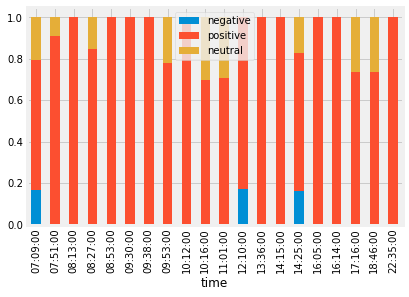

In [213]:
TITLE = "Negative, neutral, and positive sentiment for FB on 2019-01-03"
COLORS = ["red","orange", "green"]
# Drop the columns that aren't useful for the plot
plot_day = single_day.drop(['compound','headline'],axis=1)
# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative','positive','neutral']
# Plot a stacked bar chart
plot_day.plot(kind='bar',stacked=True)


### To be further developed